In [593]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


plt.figure(figsize=(17, 6))
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

<Figure size 1224x432 with 0 Axes>

#### Import Data

In [437]:
raw_use_of_force = pd.read_csv("./../use-of-force.csv")

In [438]:
raw_use_of_force

,ID,Incident_Num,Incident_Type,Occured_date_time,Precinct,Sector,Beat,Officer_ID,Subject_ID,Subject_Race,Subject_Gender
0,18412-2238-14470,18412,Level 1 - Use of Force,2017-11-28T01:40:00,NaN,-,NaN,2238,14470,Black or African American,Female
1,16162-1589-12833,16162,Level 1 - Use of Force,2017-06-22T04:15:00,NaN,-,NaN,1589,12833,Black or African American,Male
2,15041-2017-12130,15041,Level 1 - Use of Force,2017-03-30T15:59:00,NaN,-,NaN,2017,12130,White,Male
3,29139-4759-15571,29139,Level 1 - Use of Force,2018-02-15T13:06:00,NaN,-,NaN,4759,15571,Black or African American,Male
4,30425-4745-16299,30425,Level 1 - Use of Force,2018-07-17T21:00:00,NaN,-,NaN,4745,16299,White,Female
5,30638-2146-17272,30638,Level 1 - Use of Force,2018-07-21T18:58:00,NaN,-,NaN,2146,17272,White,Male
6,18081-1852-14330,18081,Level 1 - Use of Force,2017-11-14T12:56:00,NaN,-,NaN,1852,14330,NaN,Female
7,15097-704-12153,15097,Level 1 - Use of Force,2017-04-03T10:30:00,NaN,-,NaN,704,12153,Black or African American,Female
8,14270-1578-11649,14270,Level 1 - Use of Force,2017-01-26T16:30:00,NaN,-,NaN,1578,11649,White,Male
9,15097-704-11880,15097,Level 1 - Use of Force,2017-04-03T10:30:00,NaN,-,NaN,704,11880,Black or African American,Male


### Data Cleaning

In [439]:
# 1 - Substituir o sinal "-" pelo "nan" que tem um melhor desempenho para computar valores faltosos

raw_use_of_force.loc[raw_use_of_force.Sector == '-', 'Sector'] = np.nan

In [440]:
# 2 - Converter do campo de data do tipo string para o tipo datetime

raw_use_of_force['Occured_date_time'] = pd.to_datetime(raw_use_of_force['Occured_date_time'])

In [441]:
# 3 - Analisando os dados percebemos que delegacia S tem dados do setor U, mas o setor U pertence apenas a delegacia N,
# vamos então alterar o valor da delegacia de S para N para este setor.

raw_use_of_force.loc[(raw_use_of_force['Sector'] == 'U') & (raw_use_of_force['Precinct'] == 'S'),
                                        'Precinct'] = 'N'

In [442]:
# 4 - Também é possível perceber que existe uma delagacia sobresalente (X), esta delagacia não é mencionada pelo departamento 
# de Seattle, então vamos excluí-la.

raw_use_of_force = raw_use_of_force[raw_use_of_force['Precinct'] != 'X']

### Análise Exploratória de Dados

###### 1. Como é a distribuição do uso de força dentre as delegacias e os setores? Em cada setor, qual o *beat* com maior número de incidentes? Apresente também o ranking dos setores segundo o percentual de incidentes "Level 2" em relação ao total de incidentes do respectivo setor.

###### Uso da força por delegacia

In [515]:
precinct_groupby = raw_use_of_force.groupby('Precinct').count() 

In [516]:
# Selecionando apenas um campo onde existe a contagem, renomeando o campo e ordenado os dados.

precinct_groupby = precinct_groupby[['Incident_Num']]
precinct_groupby.rename(columns={'Incident_Num': 'Quantity'}, inplace=True)
precinct_groupby.sort_values(by='Quantity', ascending=False ,inplace=True)

In [519]:
precinct_groupby

,Quantity
Precinct,
W,2015
N,1836
E,1434
S,1346
SW,480


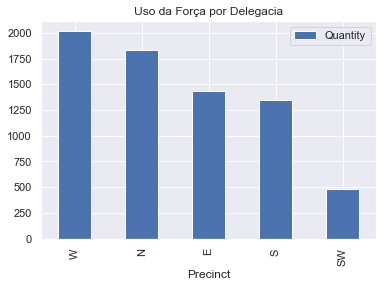

In [594]:
precinct_groupby.plot(kind='bar', title='Uso da Força por Delegacia')

######  Uso da força por setor

In [511]:
sector_groupby = raw_use_of_force.groupby(['Precinct', 'Sector']).count()

In [512]:
# Selecionando apenas um campo onde existe a contagem, renomeando o campo e ordenado os dados.

sector_groupby = sector_groupby[['Incident_Num']]
sector_groupby.rename(columns={'Incident_Num': 'Quantity'}, inplace=True)
sector_groupby.sort_values(by='Quantity', ascending=False, inplace=True)

In [518]:
sector_groupby

,,Quantity
Precinct,Sector,
E,E,818
W,K,782
S,S,576
N,N,537
W,D,530
S,R,514
W,M,496
E,G,420
N,U,373


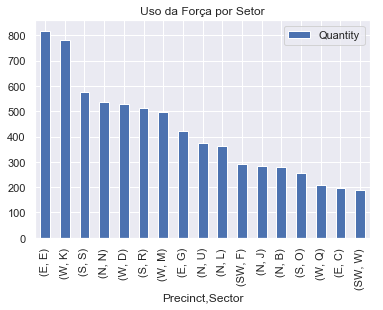

In [595]:
sector_groupby.plot(kind='bar', title='Uso da Força por Setor')

###### Uso da força por beat

In [557]:
beat_groupby = raw_use_of_force.groupby(['Precinct', 'Sector', 'Beat']).count()

In [558]:
# Selecionando apenas um campo onde existe a contagem, renomeando o campo e ordenado os dados.

beat_groupby = beat_groupby[['Incident_Num']]
beat_groupby.rename(columns={'Incident_Num': 'Quantity'}, inplace=True)
beat_groupby.sort_values(by='Quantity', ascending=False, inplace=True)
beat_groupby.reset_index(inplace=True)

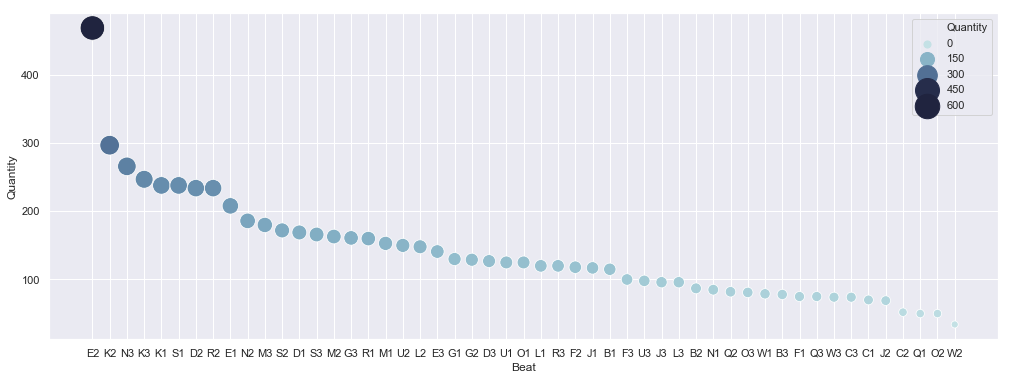

In [589]:
# Distrubuição do uso da força por todos os beats

sns.scatterplot(x='Beat', y='Quantity', palette=cmap, hue='Quantity', size='Quantity',sizes=(50, 600), data=beat_groupby)

In [579]:
beat_groupby_10 = beat_groupby.head(10)
beat_groupby_10.set_index(['Precinct', 'Sector', 'Beat'], inplace=True)

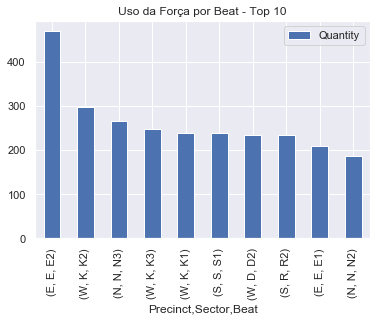

In [592]:
# Distribuição do uso da força apenas pelos 10 maiores números de ocorrências

beat_groupby_10.plot(kind='bar', title='Uso da Força por Beat - Top 10')

###### Rank Setor

In [449]:
sector_incident_type = raw_use_of_force.groupby(['Precinct', 'Sector', 'Incident_Type'])['Incident_Num'].count()

In [450]:
sector_incidente_percent = sector_incident_type.groupby(level=1).apply(lambda x: x * 100/ x.sum()).reset_index()

In [451]:
sector_incidente_percent

,Precinct,Sector,Incident_Type,Incident_Num
0,E,C,Level 1 - Use of Force,80.102041
1,E,C,Level 2 - Use of Force,19.897959
2,E,E,Level 1 - Use of Force,68.948655
3,E,E,Level 2 - Use of Force,31.051345
4,E,G,Level 1 - Use of Force,69.285714
5,E,G,Level 2 - Use of Force,30.714286
6,N,B,Level 1 - Use of Force,66.785714
7,N,B,Level 2 - Use of Force,33.214286
8,N,J,Level 1 - Use of Force,86.170213
9,N,J,Level 2 - Use of Force,13.829787


##### 2. Com relação à distribuição dos incidentes no tempo, é possível encontrar picos ou linhas de tendência dentro dos dias, dos meses, das semanas ou dos anos?

###### Incidentes por dia

In [452]:
incident_date_day = raw_use_of_force.copy()

In [453]:
incident_date_day['date'] = pd.to_datetime(incident_date_day['Occured_date_time']).dt.to_period('D')

In [454]:
incident_date_day = incident_date_day.groupby(['date']).count()

In [455]:
# Selecionando apenas um campo onde existe a contagem e renomeando.

incident_date_day = incident_date_day[['Incident_Num']]
incident_date_day.rename(columns={'Incident_Num': 'Quantity'}, inplace=True)

In [456]:
incident_date_day

,Quantity
date,
2014-01-27,1
2014-02-25,1
2014-03-13,6
2014-03-20,2
2014-04-01,1
2014-04-02,10
2014-04-03,11
2014-04-04,8
2014-04-05,14


###### Incidentes por ano-mês

In [457]:
incident_date_year_month = raw_use_of_force.copy()

In [458]:
incident_date_year_month['year_month'] = incident_date_year_month['Occured_date_time'].dt.to_period('M')

In [459]:
incident_date_year_month = incident_date_year_month.groupby(['year_month']).count()

In [460]:
# Selecionando apenas um campo onde existe a contagem e renomeando.

incident_date_year_month = incident_date_year_month[['Incident_Num']]
incident_date_year_month.rename(columns={'Incident_Num': 'Quantity'}, inplace=True)

In [461]:
incident_date_year_month

,Quantity
year_month,
2014-01,1
2014-02,1
2014-03,8
2014-04,233
2014-05,252
2014-06,173
2014-07,188
2014-08,157
2014-09,152


###### Incidentes por semana

In [462]:
incident_date_week = raw_use_of_force.copy()

In [463]:
incident_date_week['week'] = pd.to_datetime(incident_date_week['Occured_date_time']).dt.to_period('W')

In [464]:
incident_date_week = incident_date_week.groupby(['week']).count()

In [465]:
# Selecionando apenas um campo onde existe a contagem e renomeando.

incident_date_week = incident_date_week[['Incident_Num']]
incident_date_week.rename(columns={'Incident_Num': 'Quantity'}, inplace=True)

In [466]:
incident_date_week

,Quantity
week,
2014-01-27/2014-02-02,1
2014-02-24/2014-03-02,1
2014-03-10/2014-03-16,6
2014-03-17/2014-03-23,2
2014-03-31/2014-04-06,55
2014-04-07/2014-04-13,32
2014-04-14/2014-04-20,79
2014-04-21/2014-04-27,40
2014-04-28/2014-05-04,127


###### Incidentes por ano

In [467]:
incident_date_year = raw_use_of_force.copy()

In [468]:
incident_date_year['year'] = pd.to_datetime(incident_date_year['Occured_date_time']).dt.to_period('Y')

In [469]:
incident_date_year = incident_date_year.groupby(['year']).count()

In [470]:
# Selecionando apenas um campo onde existe a contagem e renomeando.

incident_date_year = incident_date_year[['Incident_Num']]
incident_date_year.rename(columns={'Incident_Num': 'Quantity'}, inplace=True)

In [471]:
incident_date_year

,Quantity
year,
2014,1615
2015,1940
2016,1477
2017,1526
2018,1160


##### 3. A polícia deseja dar início a uma investigação interna para verificar se existem policiais excessivamente violentos. No entanto, o prazo para o término desta investigação é bastante limitado. Elabore um script capaz de elencar os policiais em ordem decrescente de chance de violência excessiva com base no número de incidentes dos quais eles participaram.



In [472]:
incident_office = raw_use_of_force.groupby(['Officer_ID'])['Incident_Num'].count()

In [473]:
incident_office = incident_office.reset_index()

In [474]:
incident_office['percentage'] = incident_office['Incident_Num']/incident_office['Incident_Num'].sum()

In [475]:
incident_office.sort_values(by='percentage', ascending=False)

,Officer_ID,Incident_Num,percentage
81,456,74,0.009588
609,1697,45,0.005831
484,1559,44,0.005701
715,1807,41,0.005312
661,1750,41,0.005312
684,1775,40,0.005183
123,612,39,0.005053
422,1239,37,0.004794
646,1735,37,0.004794
701,1792,36,0.004664


###### 4. Uma métrica interessante para a polícia é o grau de reincidência por parte dos civis. Apresente o percentual de casos reincidentes em relação ao total de incidentes em cada setor e verifique se há correlação entre esta métrica e o percentual de incidentes "Level 2" calculado na questão 1. Que interpretação pode ser dada a este resultado?

In [476]:
incident_sector_subject = raw_use_of_force.groupby(['Precinct', 'Sector', 'Subject_ID']).count()

In [477]:
incident_sector_subject = incident_sector_subject[['Incident_Num']]

In [478]:
incident_sector_subject.loc[incident_sector_subject['Incident_Num'] >= 2, 'Repeated'] = True

In [479]:
incident_sector_subject.loc[incident_sector_subject['Incident_Num'] == 1, 'Repeated'] = False

In [480]:
incident_sector_subject

Incident_Num  Repeated
Precinct Sector Subject_ID                        
E        C      169                    1     False
                170                    1     False
                171                    1     False
                203                    1     False
                375                    3      True
                386                    1     False
                541                    1     False
                613                    2      True
                742                    3      True
                746                    1     False
                889                    3      True
                1151                   1     False
                1257                   2      True
                1356                   1     False
                1357                   2      True
                1381                   1     False
                1511                   1     False
                1611                   2      True
                1722                   1     False
                2036                   1     False
                2416                   1     False
                2417                   1     False
                2457                   2      True
                2738                   2      True
                2783                   8      True
                2852                   1     False
                2884                   1     False
                3074                   1     False
                3275                   1     False
                3287                   2      True
...                                  ...       ...
W        Q      12285                  1     False
                12355                  1     False
                12447                  1     False
                12572                  4      True
                12575                  1     False
                12600                  2      True
                12604                  1     False
                12605                  1     False
                12626                  1     False
                12901                  3      True
                13119                  1     False
                13185                  2      True
                13323                  1     False
                13568                  3      True
                13774                  3      True
                13775                  2      True
                14312                  1     False
                14457                  1     False
                14468                  1     False
                14507                  1     False
                14881                  1     False
                14891                  1     False
                15383                  1     False
                15429                  1     False
                15726                  1     False
                15951                  1     False
                15968                  1     False
                16182                  2      True
                16428                  1     False
                16755                  1     False

[4456 rows x 2 columns]

In [481]:
incident_sector_subject_count = incident_sector_subject.groupby(['Precinct', 'Sector', 'Repeated']).count()

In [482]:
incident_sector_subject_count = incident_sector_subject_count.groupby(level=1).apply(lambda x: x * 100/ x.sum())

In [483]:
incident_sector_subject_count

Incident_Num
Precinct Sector Repeated              
E        C      False        71.851852
                True         28.148148
         E      False        66.940452
                True         33.059548
         G      False        60.493827
                True         39.506173
N        B      False        66.666667
                True         33.333333
         J      False        66.666667
                True         33.333333
         L      False        62.995595
                True         37.004405
         N      False        73.295455
                True         26.704545
         U      False        62.135922
                True         37.864078
S        O      False        68.902439
                True         31.097561
         R      False        74.712644
                True         25.287356
         S      False        72.609819
                True         27.390181
SW       F      False        68.508287
                True         31.491713
         W      False        61.538462
                True         38.461538
W        D      False        70.000000
                True         30.000000
         K      False        66.737740
                True         33.262260
         M      False        67.987805
                True         32.012195
         Q      False        69.629630
                True         30.370370

In [484]:
sector_incidente_percent.reset_index()

,index,Precinct,Sector,Incident_Type,Incident_Num
0,0,E,C,Level 1 - Use of Force,80.102041
1,1,E,C,Level 2 - Use of Force,19.897959
2,2,E,E,Level 1 - Use of Force,68.948655
3,3,E,E,Level 2 - Use of Force,31.051345
4,4,E,G,Level 1 - Use of Force,69.285714
5,5,E,G,Level 2 - Use of Force,30.714286
6,6,N,B,Level 1 - Use of Force,66.785714
7,7,N,B,Level 2 - Use of Force,33.214286
8,8,N,J,Level 1 - Use of Force,86.170213
9,9,N,J,Level 2 - Use of Force,13.829787
